### Feature Scaling - Standardization

#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.linear_model import LogisticRegression

#### Loading Datasets

In [2]:
df = pd.read_csv("/home/kaifee/Desktop/Data Science/Datasets/Social Network Ads/Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Purchased
248,0
85,1
140,0
207,0
225,0


In [5]:
df.columns

Index(['Purchased'], dtype='object')

#### Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"], test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((280, 0), (120, 0))

#### StandardScaler

In [8]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

ValueError: at least one array or dtype is required

In [ ]:
scaler.mean_

AttributeError: 'StandardScaler' object has no attribute 'mean_'

In [ ]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


#### Converting numpy array to dataframe

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [ ]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#### Effects of Scaling

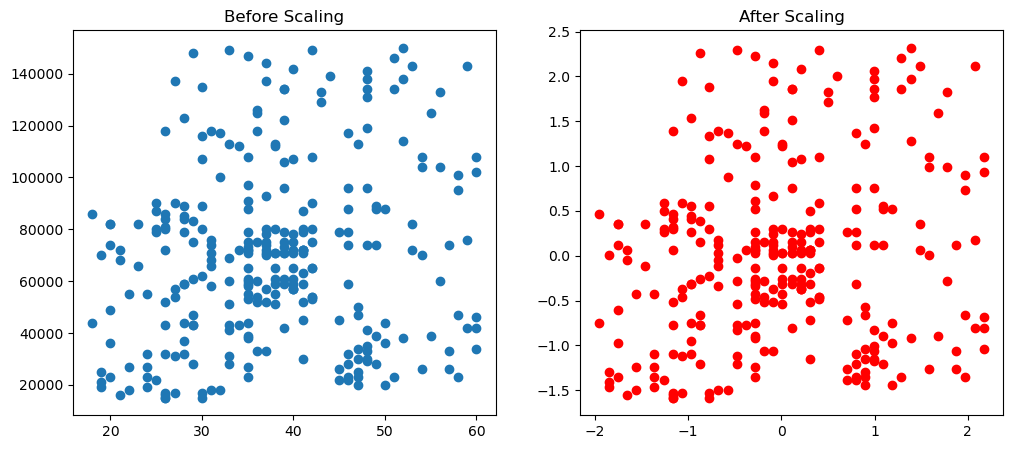

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scaling")
plt.show()

#### Comparison between "Before Scaling" vs "After Scaling

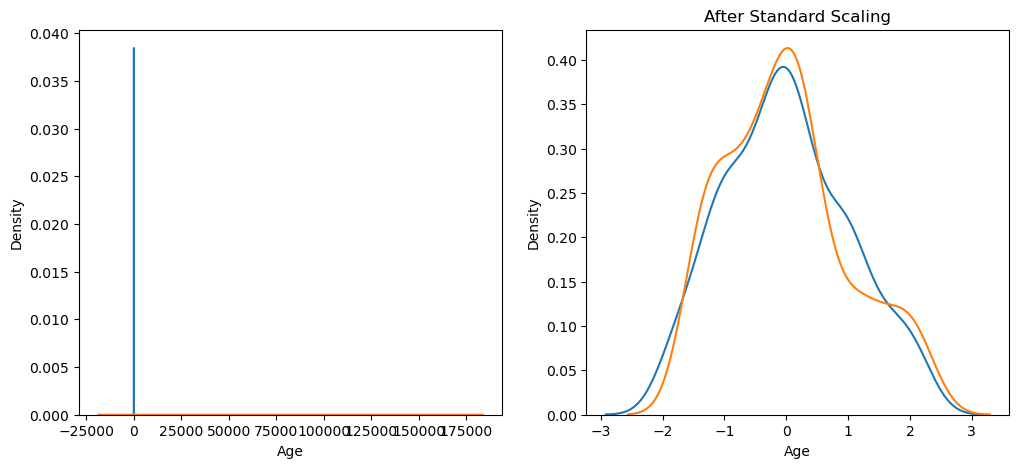

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title = ("Before Scaling")
sns.kdeplot(x_train["Age"], ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"], ax=ax1)

# after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(x_train_scaled["Age"], ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax=ax2)
plt.show()




#### Comparison of Distributions

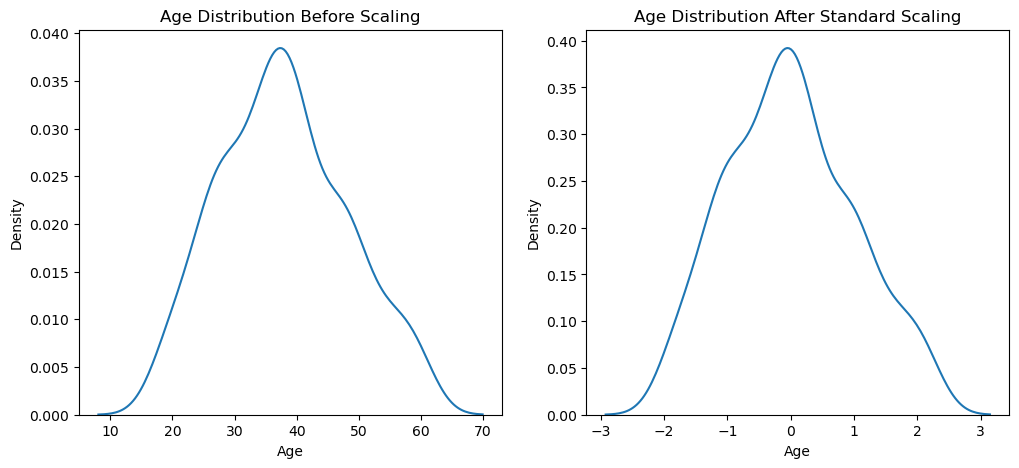

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(x_train["Age"], ax=ax1)

# after scaling
ax2.set_title("Age Distribution After Standard Scaling")
sns.kdeplot(x_train_scaled["Age"], ax=ax2)
plt.show()

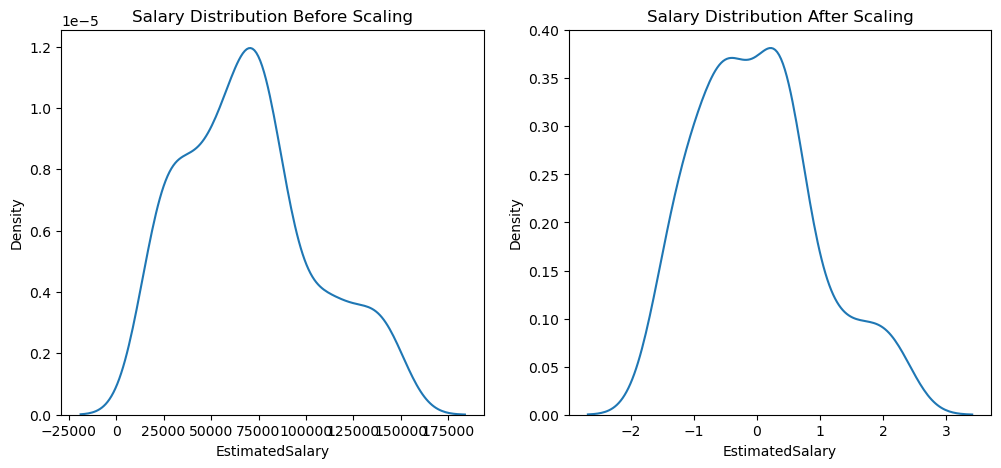

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title("Salary Distribution Before Scaling")
sns.kdeplot(x_train["EstimatedSalary"], ax=ax1)

# after scaling
ax2.set_title("Salary Distribution After Scaling")
sns.kdeplot(x_test_scaled["EstimatedSalary"], ax=ax2)
plt.show()


#### Importance of Scaling

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


#### Checking scaling for Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [ ]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Effect of Outlier